# Linear regression and stohastic gradient descent

LINEAR REGRESSION for 3 attributes


$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$


## Gradient descent

$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$


## Stohastic gradient descent

$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$


## Normal Equation  

$$\Large y = Xw$$

$$\Large X^Ty = X^TXw$$

$$\Large w = {(X^TX)}^{-1}X^Ty$$


$$\Large X^TXw = X^Ty$$




In [351]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

In [352]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

In [353]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [354]:
# Ваш код здесь

**X - attributes, y - target value**

In [355]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values


**Scaling of attributes by using .mean() and .std()**

In [356]:
means, stds = X.mean(axis = 0), X.std(axis = 0)
type(X)

numpy.ndarray

In [357]:
X_normalized = (X - means)/stds
X_normalized[0, :]


array([0.96985227, 0.98152247, 1.77894547])

**Adding the column of ones to substitute w0 using h.stack**

In [358]:
import numpy as np
ones = np.ones((200,1))
X = np.hstack((X_normalized, ones))
X[0, :]




array([0.96985227, 0.98152247, 1.77894547, 1.        ])

**Function mserror which counts MSE, takes y and y predicted.**

In [359]:
import numpy as np
def mserror(y, y_pred):
    return ((y-y_pred)**2).sum()/len(y_pred) 

**MSE for predicted as mean**

In [360]:
y_mean = np.array([y.mean()]*len(y))
answer1 = mserror(y, y_mean)
write_answer_to_file(answer1, '1.txt')



**Weights 1D array w function**

In [361]:
def normal_equation(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y) 
    res = np.linalg.solve(a, b) 
    return res

In [362]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)
means = X.mean(axis = 0)



[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


**Prediction for first line **

In [363]:
answer2 = np.dot(X.mean(axis = 0), norm_eq_weights)
print(answer2)
write_answer_to_file(answer2, '2.txt')

[14.0225]


**Liniar prediction function**

In [364]:
def linear_prediction(X, w):
    return np.dot(X, w)


**MSE for predicted values**

In [365]:
answer3 = mserror(y, linear_prediction(X,norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')


2.784126314510936


**Function stohastic_gradient_step implementing step of stohastic gradien descent**

In [366]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = X.shape[0]                   # всего обьектов (нормировка)
    x = X[train_ind]                 # текуший случайный k обьект 
    y_pred = linear_prediction(x, w) # предсказание для к случайного обьекта 
    rs = (y_pred - y[train_ind])     # регрессионый остаток для k обьекта 
    
    grad0 = 2.0/N*x[0]*rs
    grad1 = 2.0/N*x[1]*rs
    grad2 = 2.0/N*x[2]*rs
    grad3 = 2.0/N*x[3]*rs
    return  ((w - eta * np.array([grad0, grad1, grad2, grad3])))
stochastic_gradient_step(X, y,  [[1],[1],[1],[1]], 2, eta=0.01)

array([[0.99901387],
       [1.00099413],
       [1.00116005],
       [1.00065041]])

**Stohastic_gradient_descent implementation**


In [367]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
     
    weight_dist = np.inf
    w = w_init
    # Errorr on every step list
    errors = []
    # Iteration counter
    iter_num = 0
    # pseudorandom numbers
    np.random.seed(seed)
        
    
    while iter_num < max_iter:
        random_ind = np.random.randint(X.shape[0])
        
        # Weights refresh
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        # Error counting
        error = mserror(y, linear_prediction(X, new_w))
        errors.append(error)
        
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1
                
    return w, errors



In [368]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [[1],[1],[1],[1]],max_iter=1e5)             
print(stoch_grad_desc_weights)

[[ 3.9491285 ]
 [ 2.76784622]
 [-0.04540114]
 [14.01966176]]
CPU times: user 3.03 s, sys: 7.5 ms, total: 3.04 s
Wall time: 3.04 s


**First 50 iteration of stochastic descent**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'MSE')

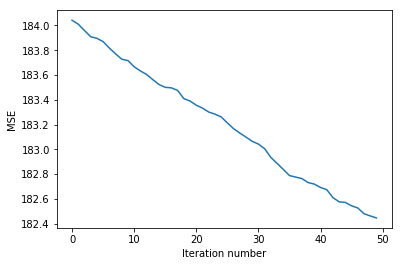

In [369]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')

ylabel('MSE')

**10^5 Iterations**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,u'MSE')

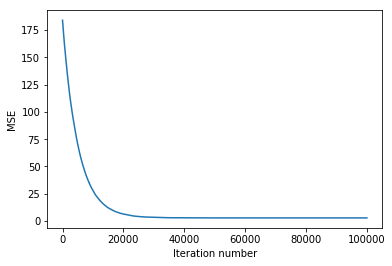

In [370]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [371]:
stoch_grad_desc_weights
y_pred = linear_prediction(X, stoch_grad_desc_weights)

In [372]:
stoch_errors_by_iter[-1]

2.786371424601604

In [373]:
answer4 = mserror(y, y_pred)
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.786371424601604
